In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
training_data = pd.read_csv('train_labels.csv')

train_details = pd.read_csv('train_time_series.csv')

training_data_joined = pd.merge(train_details[['key','x','y','z']],training_data,how='inner',on='key')
training_data_joined = training_data_joined[['x','y','z','label']]
print(training_data_joined.columns)

training_data_joined.head(2)

Index(['x', 'y', 'z', 'label'], dtype='object')


,x,y,z,label
0,-0.053802,-0.987701,0.068985,1
1,0.013718,-0.852371,-0.000870,1


In [3]:
count_class_2, count_class_3,count_class_4,count_class_1 = training_data_joined.label.value_counts()
count_class_2, count_class_3,count_class_4,count_class_1

(213, 88, 47, 27)

In [4]:
# Divide by class
df_class_1 = training_data_joined[training_data_joined['label'] == 1]
df_class_2 = training_data_joined[training_data_joined['label'] == 2]
df_class_3 = training_data_joined[training_data_joined['label'] == 3]
df_class_4 = training_data_joined[training_data_joined['label'] == 4]

df_class_1_over = df_class_1.sample(count_class_2, replace=True)
df_class_3_over = df_class_3.sample(count_class_2, replace=True)
df_class_4_over = df_class_4.sample(count_class_2, replace=True)
df_test_over = pd.concat([df_class_2, df_class_1_over,df_class_3_over,df_class_4_over], axis=0)

print('Random over-sampling:')
print(df_test_over.label.value_counts())

Random over-sampling:
4    213
3    213
2    213
1    213
Name: label, dtype: int64


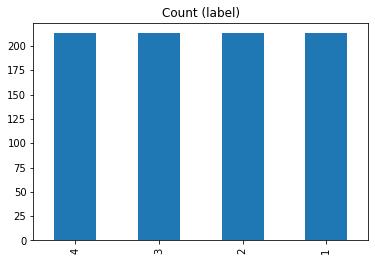

In [5]:
df_test_over.label.value_counts().plot(kind='bar', title='Count (label)');

In [567]:
import xgboost
from sklearn.model_selection import train_test_split

ind = df_test_over[['x','y','z']].values
dep = df_test_over['label'].values
X_train, X_test, y_train, y_test = train_test_split(ind,dep,test_size = 0.2)

In [568]:
clf = xgboost.XGBClassifier()
clf.fit(X_train, y_train)
print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.8713450292397661


In [569]:
#saving test data
test_data = pd.read_csv(r'C:\Users\toshiba\Documents\Python Scripts\HarvardX_PH526xUsingPythonForResearch\FinalProject\test_labels.csv')
test_details = pd.read_csv(r'C:\Users\toshiba\Documents\Python Scripts\HarvardX_PH526xUsingPythonForResearch\FinalProject\test_time_series.csv')

In [570]:
predictedlabels = clf.predict(test_details[['x','y','z']].values)
#predictedlabels = pd.DataFrame(predictedlabels,columns=['labels'])

test_details['label'] = predictedlabels

In [571]:
test_data.set_index('timestamp', inplace=True)
test_data.update(test_details.set_index('timestamp'))
test_data.reset_index()  # to recover the initial structure
test_data.to_csv("testdatawithlabels.csv")